# VO2 Max Model Experiments
##### Andrew Lefebvre and Adam Cabral

### Here we test multiple different regression methods and compare their results to find the best to use.

In [1]:
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from matplotlib import pyplot as plt

In [2]:
# test_df = pd.read_csv("./data/rawData/sbj_1_I.csv")
df = pd.read_csv("../data/concatedData/combined_csv.csv")
prepro = preprocessing.MinMaxScaler()

# df = pd.read_csv("./data/rawData/sbj_2_I.csv")
df.drop(['time'], axis=1, inplace=True)
# test_df.drop(['Cadence', 'Time'], axis=1, inplace=True)

In [3]:
df.head()

,Power,Oxygen,Cadence,HR,RF
0,0.0,742.400000,0.0,73.200000,16.800000
1,0.0,737.500000,0.0,73.500000,16.000000
2,0.0,729.261905,0.0,73.642857,15.404762
3,0.0,718.937500,0.0,73.687500,14.937500
4,0.0,707.222222,0.0,73.666667,14.555556


In [4]:
df.describe()

,Power,Oxygen,Cadence,HR,RF
count,194331.000000,194331.000000,194331.000000,194331.000000,194331.000000
mean,142.437478,2313.769284,70.317138,127.814212,29.158271
std,121.223069,1272.320962,36.759724,35.887111,9.604156
min,0.000000,105.273333,0.000000,45.394286,5.927273
25%,0.000000,1096.750000,80.000000,101.000000,22.300000
50%,134.000000,2282.083333,90.000000,129.900000,28.200000
75%,247.000000,3307.950000,90.000000,157.550000,35.050000
max,899.028571,5988.450000,153.268421,204.600000,172.300000


In [5]:
feat_df = df.drop(['Oxygen'], axis=1)
targ_df = df['Oxygen']

train_feat_df, test_feat_df, train_targ_df, test_targ_df = train_test_split(feat_df, targ_df, test_size = 0.20, random_state=42, shuffle=True)

train_feat_df = prepro.fit_transform(train_feat_df)
test_feat_df = prepro.transform(test_feat_df)


## Models to be tested:
##### 1. KNN Regression


In [6]:
from sklearn.neighbors import KNeighborsRegressor

# KNN_Parameters = {'n_neighbors': [i for i in range(1,100)]}
KNN_Parameters = {'n_neighbors': [5]}
neigh_regr = GridSearchCV(KNeighborsRegressor(), KNN_Parameters, verbose = 1, n_jobs = 4)
neigh_regr.fit(train_feat_df, train_targ_df)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    4.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=4, param_grid={'n_neighbors': [5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [7]:
test_pred_targ = neigh_regr.predict(test_feat_df)
print("Predicted Max Oxygen: ", test_pred_targ.max(), "Actual Max Oxygen: ", test_targ_df.max())

Predicted Max Oxygen:  5972.45 Actual Max Oxygen:  5984.55


Text(0, 0.5, 'Accuracy')

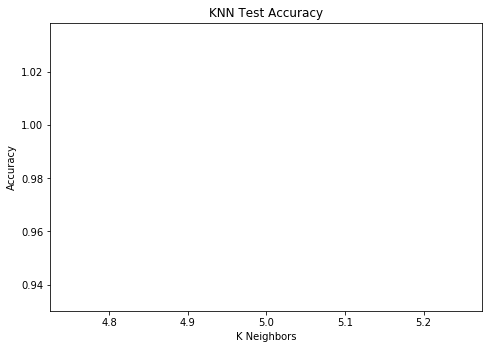

In [10]:
# neigh_regr.cv_results_['mean_test_score']
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(neigh_regr.cv_results_['param_n_neighbors'].data, neigh_regr.cv_results_['mean_test_score'])
ax.set_title("KNN Test Accuracy")
ax.set_xlabel('K Neighbors')
ax.set_ylabel('Accuracy')

In [11]:
r2_score(test_pred_targ,test_targ_df)

0.9860183574728628

##### 2. Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
lin_regr = LinearRegression(n_jobs = 4)
lin_regr.fit(train_feat_df, train_targ_df)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=4, normalize=False)

In [29]:
LinearR_pred_targ = lin_regr.predict(test_feat_df)
print("Predicted Max Oxygen: ", LinearR_pred_targ.max(), "Actual Max Oxygen: ", test_targ_df.max())

Predicted Max Oxygen:  6763.337476021723 Actual Max Oxygen:  5984.55


In [30]:
r2_score(LinearR_pred_targ,test_targ_df)

0.8726995571887195

##### 3. Support Vector Machine

In [15]:
from sklearn import svm
# svm_regr = svm.SVR()
svm_parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
 
svm_regr = GridSearchCV(svm.SVR(), svm_parameters, verbose = 3, n_jobs = 4)
# svm_regr = svm.SVR(verbose = True)
svm_regr.fit(train_feat_df, train_targ_df)

[LibSVM]

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=True)

In [16]:
svm_pred = svm_regr.predict(test_feat_df)
print("Predicted Max Oxygen: ", svm_pred.max(), "Actual Max Oxygen: ", test_targ_df.max())

Predicted Max Oxygen:  4478.306941388619 Actual Max Oxygen:  5984.55


In [17]:
r2_score(svm_pred,test_targ_df)

0.8865012065197204

##### 4. MLP Regressor

In [18]:
from sklearn.neural_network import MLPRegressor

In [19]:
mlp_regr = MLPRegressor(random_state=1, max_iter=30, solver='sgd', verbose=True).fit(train_feat_df, train_targ_df)

Iteration 1, loss = 1763299.94080347
Iteration 2, loss = 809692.75974657
Iteration 3, loss = 809693.08075841
Iteration 4, loss = 809697.88705238
Iteration 5, loss = 809697.82446199
Iteration 6, loss = 809698.61352530
Iteration 7, loss = 809687.01410572
Iteration 8, loss = 809707.16619981
Iteration 9, loss = 809700.90490300
Iteration 10, loss = 809702.21263929
Iteration 11, loss = 809703.68888681
Iteration 12, loss = 809697.89934903
Iteration 13, loss = 809688.87243547
Iteration 14, loss = 809704.78623577
Iteration 15, loss = 809699.49141594
Iteration 16, loss = 809697.54185227
Iteration 17, loss = 809701.31607519
Iteration 18, loss = 809688.58863990
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [20]:
mlp_pred = mlp_regr.predict(test_feat_df)
print("Predicted Max Oxygen: ", mlp_pred.max(), "Actual Max Oxygen: ", test_targ_df.max())

Predicted Max Oxygen:  2315.1138028853425 Actual Max Oxygen:  5984.55


In [21]:
r2_score(mlp_pred,test_targ_df)

0.0

In [27]:
andrew = [287, 90, 195, 58]
adam = [260, 85, 198, 61]

print("KNN (Andrew): ", neigh_regr.predict([andrew]))
print("Linear Regression (Andrew): ", lin_regr.predict([andrew]))
print("Support Vector Machine (Andrew): ", svm_regr.predict([andrew]))
print("SKLearn MLP (Andrew): ", mlp_regr.predict([andrew]))


print("KNN (Adam): ", neigh_regr.predict([adam]))
print("Linear Regression (Adam): ", lin_regr.predict([adam]))
print("Support Vector Machine (Adam): ", svm_regr.predict([adam]))
print("SKLearn MLP (Adam): ", mlp_regr.predict([adam]))

KNN (Andrew):  [1656.43142857]
Linear Regression (Andrew):  [1903589.01908184]
Support Vector Machine (Andrew):  [2037.14666204]
SKLearn MLP (Andrew):  [2320.9393758]
KNN (Adam):  [1735.52571429]
Linear Regression (Adam):  [1788999.5720252]
Support Vector Machine (Adam):  [2037.14666204]
SKLearn MLP (Adam):  [2321.08707258]
